In [34]:
from __future__ import print_function

import os
import sys
import struct
import numpy as np
from scipy.special import expit

import pandas as pd

import theano
import theano.tensor as T

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten

from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import HeatMap, bins

import matplotlib.pyplot as plt
%matplotlib inline

output_notebook()

Loading BokehJS ...

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [4]:
# one-hot-encode the categorical features
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
compare_hist = []
for activation in [['relu', 'relu', 'softmax'], 
                   ['relu', 'relu', 'sigmoid'], 
                   ['softplus', 'softplus', 'softmax'], 
                   ['softplus', 'softplus', 'sigmoid'],
                   ['tanh', 'tanh', 'softmax'],
                   ['tanh', 'tanh', 'sigmoid'],
                   ['linear', 'linear', 'softmax'],
                   ['linear', 'linear', 'sigmoid']]:
    model = Sequential()

    model.add(Dense(784, init='zero', input_shape=(784,)))
    model.add(Activation(activation[0]))                
    model.add(Dropout(0.3))   

    model.add(Dense(200))
    model.add(Activation(activation[1]))
    model.add(Dropout(0.3))

    model.add(Dense(10))
    model.add(Activation(activation[2]))

    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    hist = model.fit(X_train, Y_train,
              batch_size=200, nb_epoch=10, verbose=1)
    compare_hist.append(hist.history)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.3242 - acc: 0.9004     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.1310 - acc: 0.9599     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.0926 - acc: 0.9711     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.0762 - acc: 0.9766     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.0626 - acc: 0.9809     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0537 - acc: 0.9834     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.0472 - acc: 0.9852     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.0437 - acc: 0.9872     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0408 - acc: 0.9877     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.0346 - acc: 0.9893     
Epoch 1/10
60000/60000 [=========================

In [6]:
score = model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python2.7/site-packages/Keras-1.0.8-py2.7.egg/keras/models.py:644: UserWarning: The "show_accuracy" argument is deprecated, instead you should pass the "accuracy" metric to the model at compile time:
`model.compile(optimizer, loss, metrics=["accuracy"])`
  warnings.warn('The "show_accuracy" argument is deprecated, '


Test score: nan
Test accuracy: 0.098


In [7]:
p = figure(plot_width=800, plot_height=400, tools=['hover'])
# add a line renderer
p.line(range(len(compare_hist[0]['acc'])), compare_hist[0]['acc'], line_width=3, color='red', line_dash='dashed')
p.line(range(len(compare_hist[1]['acc'])), compare_hist[1]['acc'], line_width=3, color='red', legend='relu')
p.line(range(len(compare_hist[2]['acc'])), compare_hist[2]['acc'], line_width=3, color='blue', line_dash='dashed')
p.line(range(len(compare_hist[3]['acc'])), compare_hist[3]['acc'], line_width=3, color='blue', legend='softplus')
p.line(range(len(compare_hist[4]['acc'])), compare_hist[4]['acc'], line_width=3, color='pink',  line_dash='dashed')
p.line(range(len(compare_hist[5]['acc'])), compare_hist[5]['acc'], line_width=3, color='pink', legend='tanh')
p.line(range(len(compare_hist[6]['acc'])), compare_hist[6]['acc'], line_width=3, color='orange',legend='linear', line_dash='dashed')
#p.line(range(len(compare_hist[7]['acc'])), compare_hist[7]['acc'], line_width=2, color='orange', legend='linear')

p.legend.location = 'bottom_right'
show(p)

In [8]:
linear_model = Sequential()

linear_model.add(Dense(784, init='zero', input_shape=(784,)))
linear_model.add(Activation('linear'))                
linear_model.add(Dropout(0.3))   

linear_model.add(Dense(200))
linear_model.add(Activation('linear'))
linear_model.add(Dropout(0.3))

linear_model.add(Dense(10))
linear_model.add(Activation('softmax'))

linear_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
linear_model.fit(X_train, Y_train,
              batch_size=200, nb_epoch=10, verbose=1)

score = linear_model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.5068 - acc: 0.8518     
Epoch 2/10
60000/60000 [==============================] - 1s - loss: 0.3886 - acc: 0.8896     
Epoch 3/10
60000/60000 [==============================] - 1s - loss: 0.3696 - acc: 0.8958     
Epoch 4/10
60000/60000 [==============================] - 1s - loss: 0.3532 - acc: 0.9007     
Epoch 5/10
60000/60000 [==============================] - 1s - loss: 0.3451 - acc: 0.9031     
Epoch 6/10
60000/60000 [==============================] - 1s - loss: 0.3325 - acc: 0.9064     
Epoch 7/10
60000/60000 [==============================] - 1s - loss: 0.3287 - acc: 0.9081     
Epoch 8/10
60000/60000 [==============================] - 1s - loss: 0.3216 - acc: 0.9101     
Epoch 9/10
60000/60000 [==============================] - 1s - loss: 0.3220 - acc: 0.9098     
Epoch 10/10
60000/60000 [==============================] - 1s - loss: 0.3181 - acc: 0.9106     
Test score: 0.323055462244
Test accuracy: 0.9077


In [71]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
lin_predicted_classes = linear_model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9952/10000 [============================>.] - ETA: 0s

In [72]:
def plot_confusion(cm_norm, feature_names, title):
    # plot confusion matrix
    plt.figure(figsize=(4,3))
    plt.imshow(cm_norm, interpolation='nearest', cmap=plt.cm.viridis)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    tick_marks = np.arange(len(set(feature_names)))
    plt.xticks(tick_marks, set(feature_names), rotation = 90)
    plt.yticks(tick_marks, set(feature_names))
    plt.ylabel('True digit')
    plt.xlabel('Predicted digit')
    plt.show()

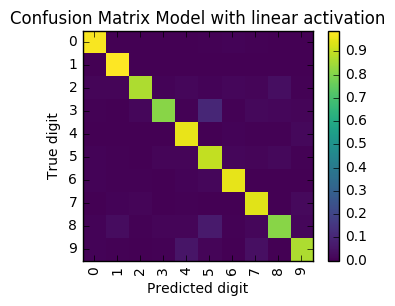

In [73]:
linear_conf_matrix = confusion_matrix(y_test, lin_predicted_classes)
lin_cm_norm = linear_conf_matrix.astype("float") / linear_conf_matrix.sum(axis=1)[:, np.newaxis]
feature_names = range(0,10)

plot_confusion(lin_cm_norm, feature_names, "Confusion Matrix Model with linear activation")

In [24]:
relu_model = Sequential()

relu_model.add(Dense(784, init='zero', input_shape=(784,)))
relu_model.add(Activation('relu'))                
relu_model.add(Dropout(0.3))

relu_model.add(Dense(200))
relu_model.add(Activation('relu'))
relu_model.add(Dropout(0.3))

relu_model.add(Dense(10))
relu_model.add(Activation('softmax'))

relu_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
relu_model.fit(X_train, Y_train,
              batch_size=200, nb_epoch=10, verbose=1)

score = relu_model.evaluate(X_test, Y_test,
                       show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
60000/60000 [==============================] - 2s - loss: 0.3226 - acc: 0.9006     
Epoch 2/10
60000/60000 [==============================] - 2s - loss: 0.1315 - acc: 0.9604     
Epoch 3/10
60000/60000 [==============================] - 2s - loss: 0.0951 - acc: 0.9715     
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.0751 - acc: 0.9770     
Epoch 5/10
60000/60000 [==============================] - 2s - loss: 0.0635 - acc: 0.9808     
Epoch 6/10
60000/60000 [==============================] - 2s - loss: 0.0548 - acc: 0.9835     
Epoch 7/10
60000/60000 [==============================] - 2s - loss: 0.0484 - acc: 0.9850     
Epoch 8/10
60000/60000 [==============================] - 2s - loss: 0.0446 - acc: 0.9867     
Epoch 9/10
60000/60000 [==============================] - 2s - loss: 0.0398 - acc: 0.9882     
Epoch 10/10
60000/60000 [==============================] - 2s - loss: 0.0355 - acc: 0.9892     
Test score: 0.073095669153
Test accuracy: 0.9835


In [74]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = relu_model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9952/10000 [============================>.] - ETA: 0s

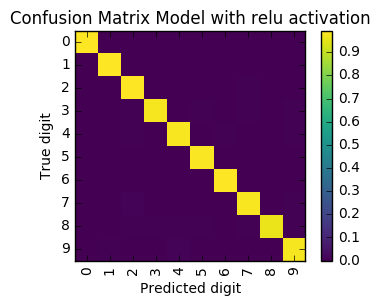

In [76]:
relu_conf_matrix = confusion_matrix(y_test, predicted_classes)
relu_cm_norm = relu_conf_matrix.astype("float") / relu_conf_matrix.sum(axis=1)[:, np.newaxis]
feature_names = range(0,10)

plot_confusion(relu_cm_norm, feature_names, "Confusion Matrix Model with relu activation")